# AI ASSIGNMENT-2

NAME: SRINATH CHITRALA
REGNO: 20MID0023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df=pd.read_csv("drug200.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
df.shape

(200, 6)

In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [8]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


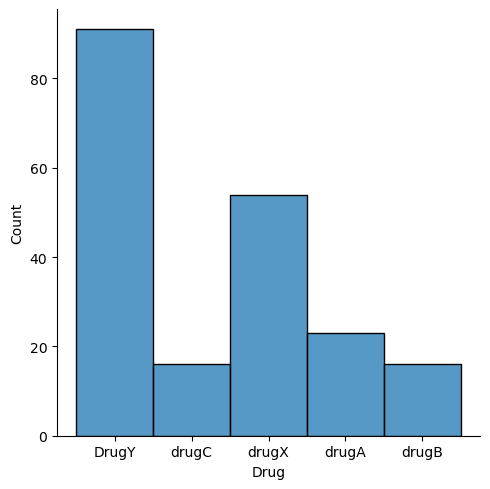

In [10]:
sns.displot(df.Drug)

<Axes: >

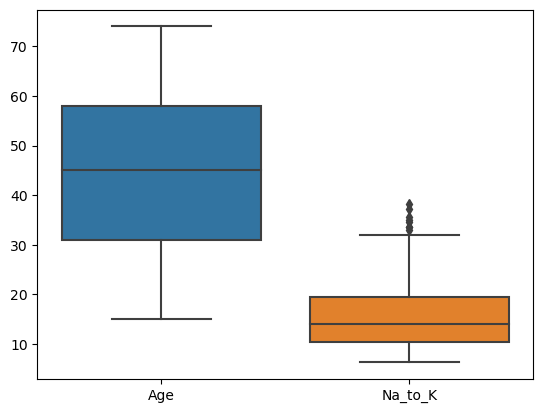

In [11]:
sns.boxplot(df)

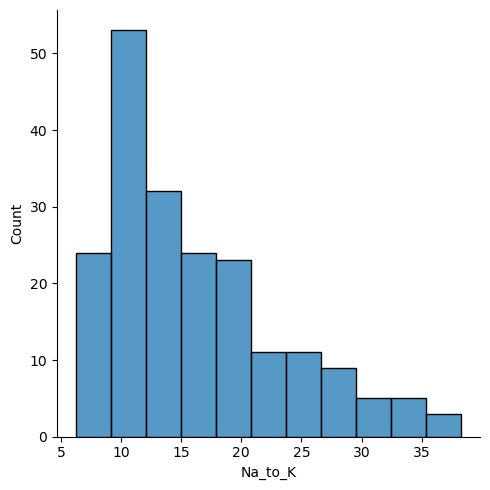

In [12]:
sns.displot(df['Na_to_K'])

<Axes: xlabel='Age', ylabel='Na_to_K'>

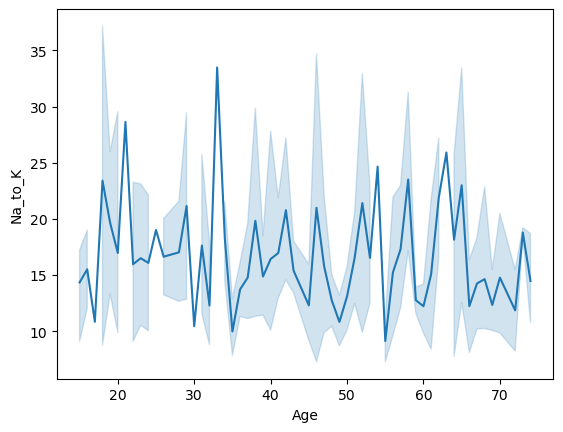

In [13]:
sns.lineplot(x=df['Age'],y=df['Na_to_K'])

<Axes: >

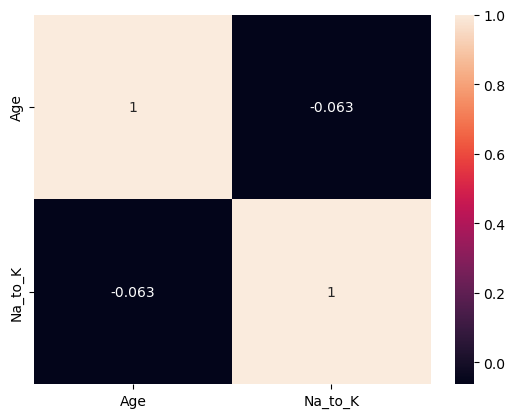

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [62]:
a=list(df['Drug'].unique())
print(a)

['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']


In [63]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [64]:
x=df.drop('Drug',axis=1)

In [65]:
y=df['Drug']

In [66]:
x=pd.get_dummies(x,columns=['Sex','BP','Cholesterol'],drop_first=True)

In [67]:
x

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0
...,...,...,...,...,...,...
195,56,11.567,0,1,0,0
196,16,12.006,1,1,0,0
197,52,9.894,1,0,1,0
198,23,14.020,1,0,1,1


In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [69]:
y = le.fit_transform(df.Drug)
y[0:5]

array([0, 3, 3, 4, 0])

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=21)

In [72]:
xtrain

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
176,48,10.446,1,0,0,1
111,47,6.683,0,0,1,1
114,20,9.281,0,0,1,1
14,50,12.703,0,0,1,0
106,22,11.953,1,0,1,0
...,...,...,...,...,...,...
120,28,27.064,1,0,1,0
112,35,9.170,1,1,0,1
48,23,31.686,1,0,1,0
4,61,18.043,0,1,0,0


In [73]:
ytrain

array([1, 4, 4, 4, 4, 2, 4, 3, 0, 4, 1, 1, 2, 0, 4, 0, 0, 4, 0, 0, 1, 4,
       0, 0, 4, 4, 3, 4, 1, 0, 1, 0, 0, 0, 0, 4, 0, 4, 4, 4, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 2, 4, 2, 1, 4, 0, 4, 0, 0, 2, 4, 1, 3, 0, 0, 0, 4,
       0, 4, 4, 0, 0, 4, 4, 0, 0, 0, 4, 3, 2, 4, 3, 4, 4, 0, 4, 3, 0, 4,
       4, 0, 4, 0, 0, 0, 4, 0, 1, 3, 2, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 1,
       4, 4, 1, 4, 3, 4, 1, 4, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 2, 3,
       4, 2, 4, 0, 2, 0, 3, 0, 1, 0, 4, 0, 3, 1, 4, 0, 1, 0, 1, 4, 0, 0,
       0, 0, 4, 0, 0, 2])

In [74]:
ytest

array([1, 0, 1, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 4, 0, 4, 2, 0, 1, 0, 2, 0,
       0, 4, 1, 0, 0, 4, 3, 0, 0, 0, 1, 0, 3, 0, 2, 0, 2, 2])

In [75]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)
ytrain = keras.utils.to_categorical(ytrain)
ytest = keras.utils.to_categorical(ytest)

In [76]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((160, 6), (40, 6), (160, 5), (40, 5))

In [77]:
from keras.models import Sequential
from keras.layers import Dense,Activation

In [78]:
model=Sequential()
model.add(Dense(4,input_dim=6,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [104]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#loss=categorical_crossentropy -> we can use model.summmary
#else No

In [105]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 28        
                                                                 
 dense_11 (Dense)            (None, 32)                160       
                                                                 
 dense_12 (Dense)            (None, 26)                858       
                                                                 
 dense_13 (Dense)            (None, 12)                324       
                                                                 
 dense_14 (Dense)            (None, 5)                 65        
                                                                 
Total params: 1,435
Trainable params: 1,435
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.fit(xtrain,ytrain,epochs=40,batch_size=6,validation_data=(xtest, ytest))

Epoch 1/40
27/27 [==============================] - 1s 11ms/step - loss: 0.1521 - accuracy: 0.9438 - val_loss: 0.4459 - val_accuracy: 0.7500
Epoch 2/40
27/27 [==============================] - 0s 4ms/step - loss: 0.1477 - accuracy: 0.9500 - val_loss: 0.3361 - val_accuracy: 0.7500
Epoch 3/40
27/27 [==============================] - 0s 4ms/step - loss: 0.1425 - accuracy: 0.9500 - val_loss: 0.4018 - val_accuracy: 0.7750
Epoch 4/40
27/27 [==============================] - 0s 4ms/step - loss: 0.1309 - accuracy: 0.9500 - val_loss: 0.3598 - val_accuracy: 0.7750
Epoch 5/40
27/27 [==============================] - 0s 4ms/step - loss: 0.1288 - accuracy: 0.9500 - val_loss: 0.3799 - val_accuracy: 0.7500
Epoch 6/40
27/27 [==============================] - 0s 4ms/step - loss: 0.1249 - accuracy: 0.9500 - val_loss: 0.3892 - val_accuracy: 0.8000
Epoch 7/40
27/27 [==============================] - 0s 4ms/step - loss: 0.1203 - accuracy: 0.9500 - val_loss: 0.4101 - val_accuracy: 0.7500
Epoch 8/40
27/27 [=

In [107]:
test_loss, test_acc = model.evaluate(xtest, ytest)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 8ms/step - loss: 0.5266 - accuracy: 0.8750
Test accuracy: 87.5
